reference pages:
- https://lumiamitie.github.io/r/python/tsne-for-r-py/
- https://rfriend.tistory.com/414
- https://github.com/DmitryUlyanov/Multicore-TSNE

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

from MulticoreTSNE import MulticoreTSNE as multiTSNE

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# data load

data_1 = np.load('../data/cont4paper.npy')
data_2 = np.load('../data/gen17dis18.npy')

data_merge = np.concatenate( (data_1, data_2), axis=0 )
print('dim(data_merge):', data_merge.shape)

dim(data_merge): (20000, 300)


In [22]:
start = time.time()

# t-SNE
tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(data_merge)

# multicore t-SNE
# tsne_result = multiTSNE(learning_rate=300, n_jobs=8).fit_transform(data_merge)

print("time (min) :", (time.time() - start) / 60.0 ) 

time (min) : 4.126660001277924


In [26]:
# data plot

df_tnse_result = pd.DataFrame(tsne_result,
                              columns=['V1', 'V2'])

df_tnse_result["label"] = 'cont'
df_tnse_result["label"][len(data_1):] = 'dis'

/home/dato/anaconda2/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


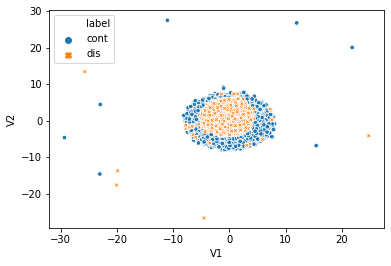

In [28]:
sns.scatterplot(x='V1', 
                y='V2', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=20, # marker size
                data=df_tnse_result)
plt.show()

In [13]:
# iris 데이터
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 결과물 재현을 위해 seed를 설정
np.random.seed(1)

# iris 데이터를 matrix로 변환시킨 후 t-SNE 적용
iris_matrix = iris.iloc[:, 0:4].values
iris_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(iris_matrix)

# 맵핑된 결과물에 원래의 레이블을 달아보자
df_iris_tsne_result = (
  pd.DataFrame(iris_tsne_result, columns=['V1', 'V2'])
    .assign(species = iris['species'])
)

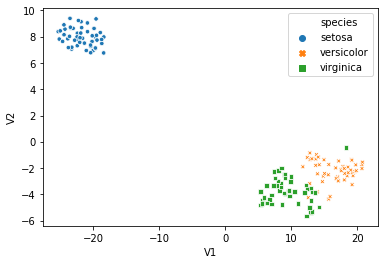

In [30]:
sns.scatterplot(x='V1', 
                y='V2', 
                hue='species', # different colors by group
                style='species', # different shapes by group
                s=20, # marker size
                data=df_iris_tsne_result)
plt.show()

In [15]:
df_iris_tsne_result

,V1,V2,species
0,-22.392036,7.783114,setosa
1,-20.022989,6.943226,setosa
2,-19.695263,7.990711,setosa
3,-19.431726,7.743164,setosa
4,-22.407133,8.266632,setosa
...,...,...,...
145,9.034280,-2.744367,virginica
146,12.002353,-3.875725,virginica
147,9.886703,-3.028973,virginica
148,8.477750,-2.001395,virginica
